# Maximum Likelihood Estimation From Scratch 
## (Gaussian Probabilistic Generative model)

- Linear Classifier.
- Probabilistic Generative model.
- Gaussian Assumption for Continuous Inputs.

### Probabilistic Generative Models
Consider the case of two classes. The posterior probability for class $C_1$ can be written as

$$ p(C_1|x) = \frac{p(x|C_1)p(C_1))}{p(x|C_1)p(C_1) + p(x|C_2)p(C_2)} $$

$$\therefore p(C_1|x) = \frac{1}{1 + \exp(-a)} = \sigma(a) $$

Where

$$ a = \ln \frac{p(x|C_1)p(C_1)}{p(x|C_2)p(C_2)}$$

and $ \sigma(a) $ is the logistic sigmoid function.

### Gaussian Assumption for Continuous Inputs

Assuming that the class-conditional densities are Gaussian.

$$ p(x|C_k) = \frac{1}{(2\pi)^{D/2}} \frac{1}{|\Sigma|^{1/2}} \exp \{ \frac{1}{2}(x-\mu_k)^T \Sigma^{-1} (x-\mu_k) \} $$

Consider the case of two classes.

$$ p(C_1|x) = \sigma(\mathbf{w}^T \mathbf{x} + \omega_0) $$

where we have defined

$$ \mathbf{w} = \Sigma^{-1}(\mu_1 - \mu_2) $$

$$ \omega_0 = -\frac{1}{2} \mu_1^T \Sigma^{-1}\mu_1 + \frac{1}{2} \mu_2^T \Sigma^{-1}\mu_2 + \ln{\frac{p(C_1)}{p(C_2)}} $$

### Maximum Likelihood Estimation (MLE)

Suppose we have a data set $ \{\mathbf{x}_n, t_n\} $

- Let denote for  $C_1 \rightarrow t_n = 1$  and for $C_2 \rightarrow t_n = 0$
- Let denote $ p(C_1) = \pi \Longrightarrow p(C_2) = 1-\pi $
- For $ \mathbf{x}_n \in C_1 $
$$ p(\mathbf{x}_n, C_1) = p(C_1)p(\mathbf{x}_n|C_1) = \pi \mathscr{N}(\mathbf{x}_n|\mu_1, \Sigma)  $$
- For $ \mathbf{x}_n \in C_2 $
$$ p(\mathbf{x}_n, C_2) = p(C_2)p(\mathbf{x}_n|C_2) = (1-\pi) \mathscr{N}(\mathbf{x}_n|\mu_2, \Sigma)  $$

Thus the likelihood function is given by:

$$ p(\mathbf{x}|\pi,\mu_1,\mu_2,\Sigma) = \prod_{n=1}^N [\pi \mathscr{N}(\mathbf{x}_n|\mu_1, \Sigma)]^{t_n} [(1-\pi) \mathscr{N}(\mathbf{x}_n|\mu_2, \Sigma) ]^{1-t_n} $$

Find the parameters that maximize the likelihood of the data we get:

- $ \pi $
$$ \pi = \frac{1}{N} \sum_{n=1}^N t_n = \frac{N_1}{N} = \frac{N_1}{N_1 + N_2}$$

- $ \mu_1 $
$$ \mu_1 = \frac{1}{N_1} \sum_{n=1}^N t_n \mathbf{x}_n $$

- $ \mu_2 $
$$ \mu_2 = \frac{1}{N_2} \sum_{n=1}^N (1 - t_n) \mathbf{x}_n $$

- $ \Sigma $ (Covariance Matrix)
$$ \Sigma = \frac{N_1}{N} \mathbf{S}_1 + \frac{N_2}{N} \mathbf{S}_2 $$

    where:

    $$ \mathbf{S}_1 = \frac{1}{N_1} \sum_{n \in C_1} (\mathbf{x}_n - \mu_1) (\mathbf{x}_n - \mu_1)^T $$
    $$ \mathbf{S}_2 = \frac{1}{N_2} \sum_{n \in C_2} (\mathbf{x}_n - \mu_2) (\mathbf{x}_n - \mu_2)^T $$

### Referrence
*Pattern Recognition and MachineLearning, Christopher M. Bishop, Springer, 2006*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class MLE:
    def __mean(self, c):
        return np.mean(self.X[self.t == c], axis=0)
        
    def __covarianc(self):
        return np.cov(self.X.T)
        
    def scatter_plot(self):
        if (hasattr(self, 'X') & hasattr(self, 'W') & hasattr(self, 'Wo') & hasattr(self, 't')):
            if (len(self.X[0]) == 2):
                color_cond=['blue' if i==1 else 'green' for i in self.t  ]
                plt.scatter(np.array(self.X[:,0]), np.array(self.X[:,1]), color=color_cond)        

                slope = -(self.W[0] / self.W[1])
                intercept = -(self.Wo / self.W[1])

                ax = plt.gca()
                ax.autoscale(False)
                x_vals = np.array(ax.get_xlim())
                y_vals = intercept + (slope * x_vals)
                plt.plot(x_vals, y_vals);

                plt.xlabel('X1')
                plt.ylabel('X2')
                plt.title('Data(X1, X2)')
                plt.show()
            else:
                print('The scatter plot is only available when the data has only 2 features')
        else:
            print('Please run fit in order to be able to plot the Data')
        return self
                
    def testing_scatter_plot(self, X, t):
        if (hasattr(self, 'W') & hasattr(self, 'Wo')):
            if (len(X[0]) == 2):
                color_cond=['blue' if i==1 else 'green' for i in t  ]
                plt.scatter(np.array(X[:,0]), np.array(X[:,1]), color=color_cond)        

                slope = -(self.W[0] / self.W[1])
                intercept = -(self.Wo / self.W[1])

                ax = plt.gca()
                ax.autoscale(False)
                x_vals = np.array(ax.get_xlim())
                y_vals = intercept + (slope * x_vals)
                plt.plot(x_vals, y_vals);

                plt.xlabel('X1')
                plt.ylabel('X2')
                plt.title('Data(X1, X2)')
                plt.show()
            else:
                print('The scatter plot is only available when the data has only 2 features')
        else:
            print('Please run fit in order to be able to plot the Data')
            
    def __activation_func(self, g):
        return (1 / (1 + np.exp(-g)))
        
    def predict(self, X):
        if (hasattr(self, 'W') & hasattr(self, 'Wo')):
            g = X@self.W + self.Wo
            a = np.round(self.__activation_func(g))
            return a
        else:
            print('Please run fit in order to be able to use predict')
            
    def accuracy(self, y_actual, y_predicted):
        return np.mean(y_actual == y_predicted) * 100
    
    def fit(self, X, t):
        self.X = X
        self.t = t
        
        N = len(t)
        N1 = sum(t == 1)
        N2 = sum(t == 0)
        
        mean1 = self.__mean(1)
        mean2 = self.__mean(0)
        covarianc = self.__covarianc()
        
        covarianc_inv = np.linalg.pinv(covarianc)
        
        self.W = covarianc_inv @ (mean1 - mean2)
        
        self.Wo = -(0.5 * mean1.T @ covarianc_inv @ mean1) + (0.5 * mean2.T @ covarianc_inv @ mean2) + (np.log((N1/N) / (1 - (N1/N))))

# Dataset 1

### Training

In [3]:
Data = np.genfromtxt('synth.tr.csv', delimiter=',', skip_header=True)
X = Data[:, 1:3]
t = Data[:, 3]

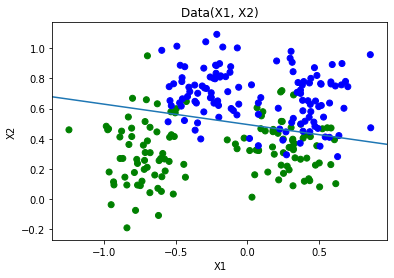

In [4]:
mle = MLE()
mle.fit(X, t)
mle.scatter_plot()

### Testing

Accuracy 89.2 %


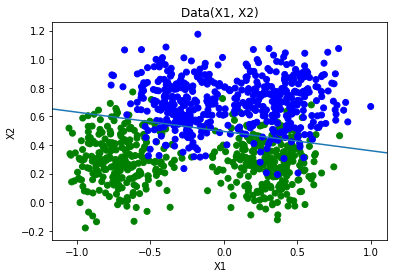

In [5]:
Data_test = np.genfromtxt('synth.te.csv', delimiter=',', skip_header=True)
X_test = Data_test[:, 1:3]
y_actual = Data_test[:, 3]
y_predicted = mle.predict(X_test)
acc = mle.accuracy(y_actual, y_predicted)
print('Accuracy', acc, '%')
mle.testing_scatter_plot(X_test, y_actual)

# Dataset 2

### Training

In [17]:
Data2 = np.genfromtxt('Data1.txt')
# Data2 = Data2[Data2[:,0] < 40] # Without outliers
X2 = Data2[:, 0:2]
t2 = np.array([1 if i >= 0 else 0 for i in Data2[:, 2]])

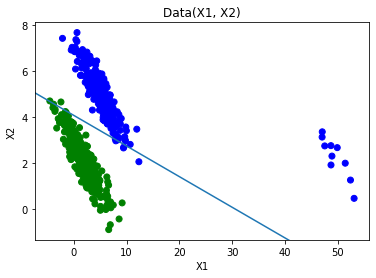

In [18]:
mle2 = MLE()
mle2.fit(X2, t2)
mle2.scatter_plot()

### Testing

Accuracy 100.0 %


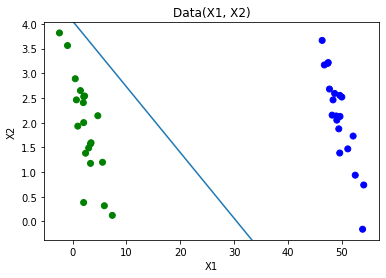

In [19]:
Data2_test = np.genfromtxt('Test1.txt')
X2_test = Data2_test[:, 0:2]
y2_actual = np.array([1 if i >= 0 else 0 for i in Data2_test[:, 2]])
y2_predicted = mle2.predict(X2_test)
acc2 = mle2.accuracy(y2_actual, y2_predicted)
print('Accuracy', acc2, '%')
mle2.testing_scatter_plot(X2_test, y2_predicted)

# Dataset 3

### Training

In [9]:
from sklearn.datasets import make_classification


In [10]:
X3, t3 = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14, class_sep=1)

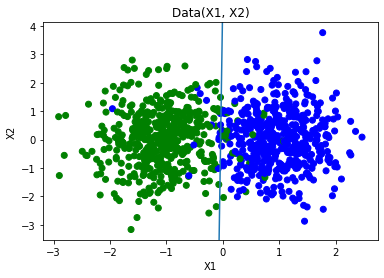

In [11]:
mle3 = MLE()
mle3.fit(X3, t3)
mle3.scatter_plot()

### Testing

Accuracy 98.66666666666667 %


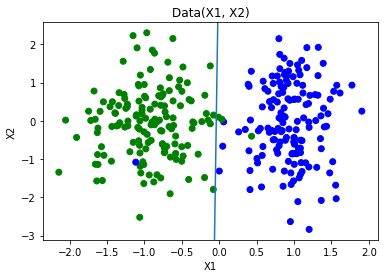

In [12]:
X3_test, y3_actual = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14, class_sep=1)
y3_predicted = mle3.predict(X3_test)
acc3 = mle3.accuracy(y3_actual, y3_predicted)
print('Accuracy', acc3, '%')
mle3.testing_scatter_plot(X3_test, y3_actual)